In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Top%20Video%20Games%201995-2021%20Metacritic/all_games.csv")
df

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [3]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month_name()
df['month_year'] = df['month'] + ' ' + df['year'].astype('str')
df.head()

,name,platform,release_date,summary,meta_score,user_review,year,month,month_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998,November,November 1998
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4,2000,September,September 2000
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008,April,April 2008
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4,1999,September,September 1999
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008,April,April 2008


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          18800 non-null  object        
 1   platform      18800 non-null  object        
 2   release_date  18800 non-null  datetime64[ns]
 3   summary       18686 non-null  object        
 4   meta_score    18800 non-null  int64         
 5   user_review   18800 non-null  object        
 6   year          18800 non-null  int64         
 7   month         18800 non-null  object        
 8   month_year    18800 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.3+ MB


In [5]:
df.drop(columns=['release_date','summary'],inplace=True)
df.head()

,name,platform,meta_score,user_review,year,month,month_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1,1998,November,November 1998
1,Tony Hawk's Pro Skater 2,PlayStation,98,7.4,2000,September,September 2000
2,Grand Theft Auto IV,PlayStation 3,98,7.7,2008,April,April 2008
3,SoulCalibur,Dreamcast,98,8.4,1999,September,September 1999
4,Grand Theft Auto IV,Xbox 360,98,7.9,2008,April,April 2008


Index([' PC', ' PlayStation 4', ' Xbox 360', ' PlayStation 2', ' Switch'], dtype='object')

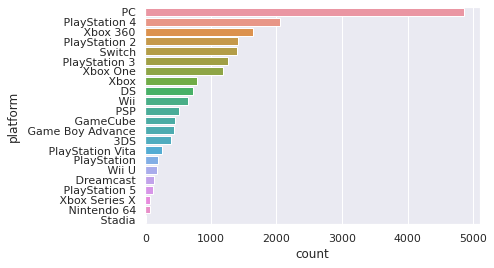

In [6]:
sns.set_theme(style="darkgrid")
sns.countplot(data=df,y='platform',order = df['platform'].value_counts().index)
popular_platforms = df['platform'].value_counts()[:5].index
popular_platforms

In [7]:
df['user_review'].unique()

array(['9.1', '7.4', '7.7', '8.4', '7.9', '8.0', '8.3', '6.2', '8.7',
       '7.5', '8.8', '8.5', '8.6', '8.9', '8.2', '9.2', '7.8', '9.0',
       '9.3', '8.1', '6.8', '7.6', '6.9', '6.6', '7.3', '7.2', '9.4',
       '5.7', '6.0', '5.8', '7.1', '3.3', '5.0', '5.5', '6.5', '5.9',
       '6.7', '3.8', '6.4', '7.0', '6.3', '4.9', 'tbd', '5.3', '3.5',
       '4.7', '6.1', '4.8', '4.1', '5.6', '4.4', '5.4', '4.6', '3.1',
       '5.2', '4.3', '1.8', '4.5', '5.1', '4.2', '4.0', '9.7', '3.2',
       '2.9', '2.1', '2.4', '3.4', '3.0', '3.7', '2.2', '2.6', '2.7',
       '2.5', '2.8', '3.9', '2.0', '9.6', '1.5', '3.6', '1.4', '1.2',
       '0.9', '1.9', '1.1', '1.7', '0.8', '1.0', '0.6', '2.3', '0.5',
       '1.6', '0.2', '0.7', '1.3'], dtype=object)

In [8]:
df['meta_score'].unique()

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20])

In [9]:
df.replace('tbd',np.NaN,inplace=True)
df = df.dropna()
df['user_review'] = df['user_review'].apply(lambda x: int(float(x)*10))
df['user_review']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        91
1        74
2        77
3        84
4        79
         ..
18795    13
18796    17
18797    29
18798    17
18799    20
Name: user_review, Length: 17435, dtype: int64

In [10]:
df.shape

(17435, 7)

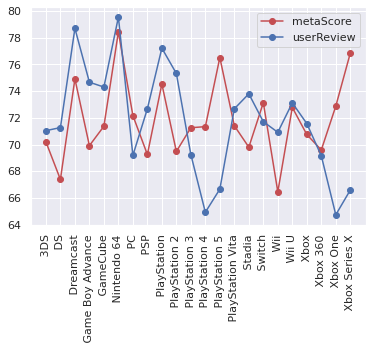

In [11]:
plat_score =df.groupby('platform')['meta_score'].mean()
user_score = df.groupby('platform')['user_review'].mean()
plt.plot(plat_score.index,plat_score[plat_score.index],'ro-',label='metaScore')
plt.plot(user_score.index,user_score[user_score.index],'bo-',label='userReview')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [12]:
critical_platforms = plat_score.sort_values(ascending=False).index[:5]
user_critical_platforms = user_score.sort_values(ascending=False).index[:5]
print("Top 5 Platform having highest mean Meta Critic rated games are :")
for i,x in enumerate(critical_platforms):
    print(f'{i+1}.{x}',end='\n')

print('\n')
print("Top 5 Platform having highest mean User rated games are :")
for i,x in enumerate(user_critical_platforms):
    print(f'{i+1}.{x}',end='\n')

Top 5 Platform having highest mean Meta Critic rated games are :
1. Nintendo 64
2. Xbox Series X
3. PlayStation 5
4. Dreamcast
5. PlayStation


Top 5 Platform having highest mean User rated games are :
1. Nintendo 64
2. Dreamcast
3. PlayStation
4. PlayStation 2
5. Game Boy Advance


In [13]:
print('Average Ratings of highest games-released platforms are:')
plat_score[popular_platforms]

Average Ratings of highest games-released platforms are:


 PC               72.171245
 PlayStation 4    71.338974
 Xbox 360         69.589528
 PlayStation 2    69.479024
 Switch           73.131579
Name: meta_score, dtype: float64

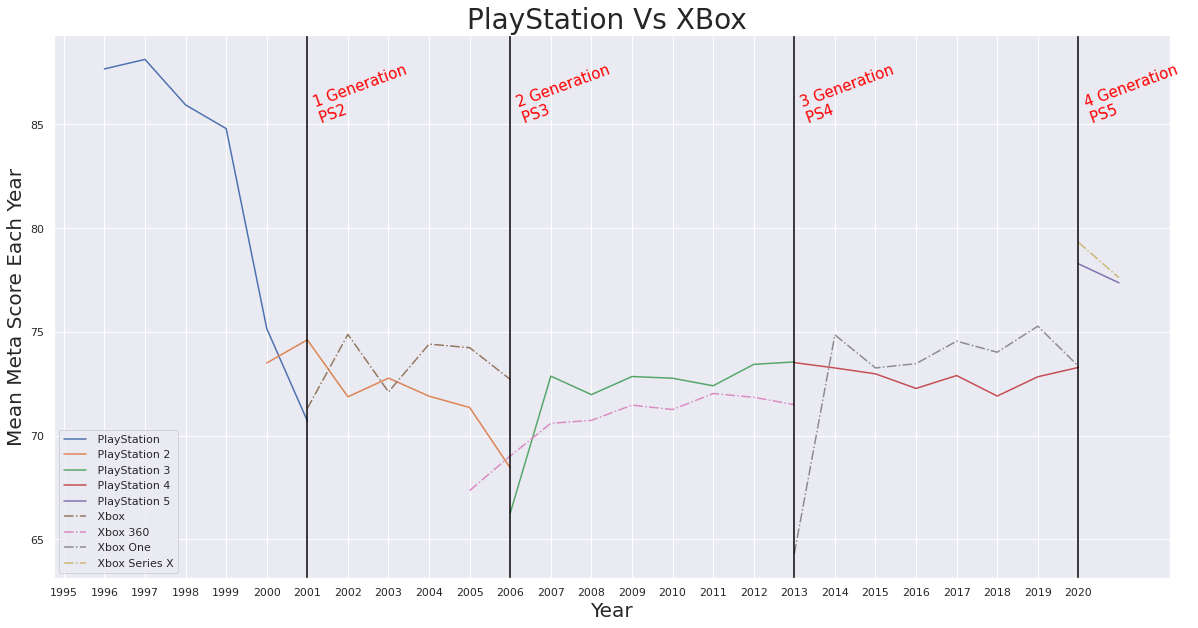

In [14]:

plt_names = [' PlayStation', ' PlayStation 2',' PlayStation 3', ' PlayStation 4', ' PlayStation 5',' Xbox',' Xbox 360', ' Xbox One',' Xbox Series X']
release_dates = [1996,2000,2006,2013,2020,2001,2005,2013,2020]
end_dates = [2001,2006,2013,2020,2030,2006,2013,2020,2030]
plt.figure(figsize=(20, 10))
for i,platform in enumerate(plt_names):
      start_year = release_dates[i]
      end_year = end_dates[i]
      linestyle = '-'
      if(platform[1]=='X'):
        linestyle = '-.'
      plt.plot(df[(df['platform']==platform) & (df['year']>=start_year) & (df['year']<=end_year) ].groupby('year')['meta_score'].mean(),label=platform,linestyle=linestyle)

for i,x in enumerate([2001,2006,2013,2020]):
    plt.axvline(x=x,color='black')
    plt.text(x,85,f' {i+1} Generation \n PS{i+2}',rotation=20,fontsize=15,color='red')
    
plt.title('PlayStation Vs XBox ',fontsize=28)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Mean Meta Score Each Year',fontsize= 20)
plt.legend()
plt.xticks(range(1995,2021))
plt.show()

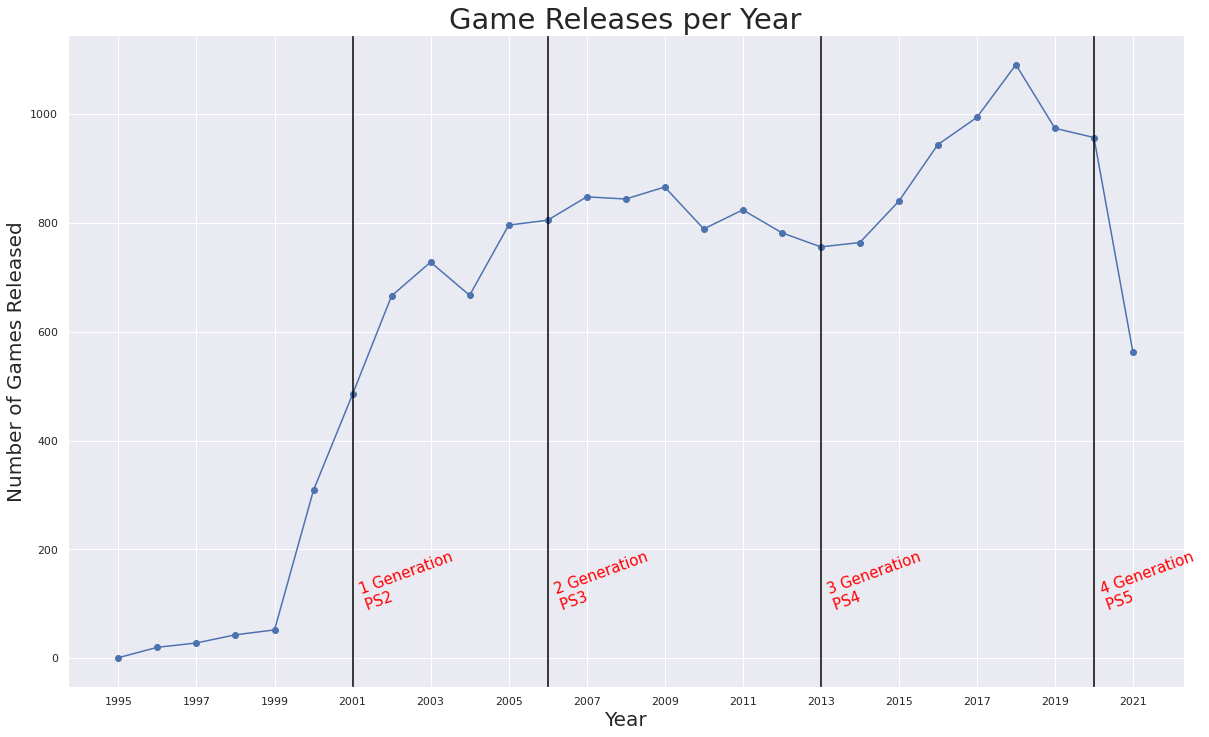

In [15]:
data = df['year'].value_counts().sort_index()
plt.figure(figsize=(20,12))
plt.plot(data,'bo-')
plt.title('Game Releases per Year',fontsize=29)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Games Released',fontsize=20)
plt.xticks(range(1995,2022,2))
for i,x in enumerate([2001,2006,2013,2020]):
    plt.axvline(x=x,color='black')
    plt.text(x,85,f' {i+1} Generation\n PS{i+2}',rotation=20,fontsize=15,color='red')

plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:504: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


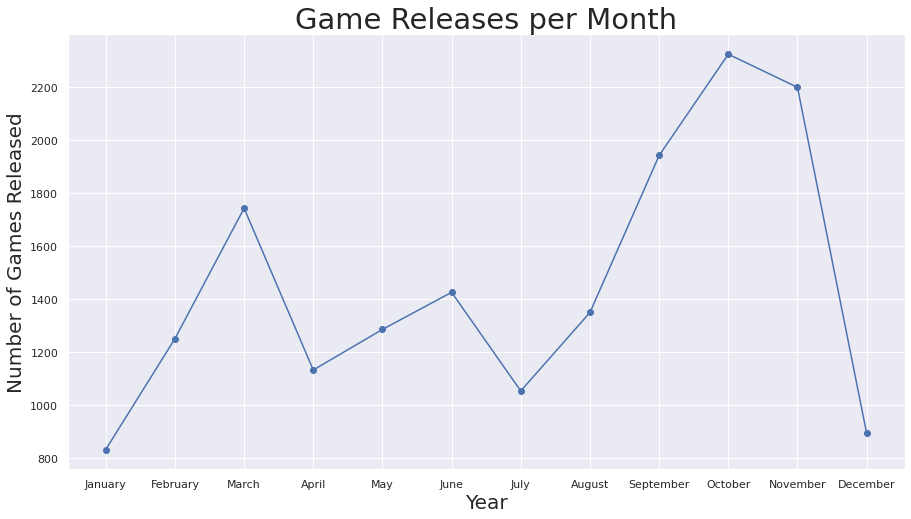

In [16]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
data = df['month'].value_counts().sort_index()
data.index = pd.CategoricalIndex(data.index, categories=months, ordered=True)
data = data.sort_index()
plt.figure(figsize=(15,8))
plt.plot(data,'bo-')
plt.title('Game Releases per Month',fontsize=29)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Games Released',fontsize=20)
plt.show()

In [17]:

years = df['year'].unique()
years.sort()
GOTYM = pd.DataFrame(index = years)
GOTYM['Winner'] = 'Placeholder'
GOTYM['Platform'] = 'Something'
GOTYM
for year in years:
    score = 0
    winner = 'placeholder'
    platform = 'placeholder'
    now = df.loc[ df['year']==year ]
    for i in now.index:
        if now['meta_score'][i] > score:
            score = now['meta_score'][i]
            winner = now['name'][i]
            platform = now['platform'][i]
    GOTYM['Winner'][year] = winner
    GOTYM['Platform'][year] = platform

GOTYM

,Winner,Platform
1995,Full Throttle,PC
1996,Sid Meier's Civilization II,PC
1997,GoldenEye 007,Nintendo 64
1998,The Legend of Zelda: Ocarina of Time,Nintendo 64
1999,SoulCalibur,Dreamcast
2000,Tony Hawk's Pro Skater 2,PlayStation
2001,Tony Hawk's Pro Skater 3,PlayStation 2
2002,Metroid Prime,GameCube
2003,The Legend of Zelda: The Wind Waker,GameCube
2004,Half-Life 2,PC


In [18]:

years = df['year'].unique()
years.sort()
GOTYM = pd.DataFrame(index = years)
GOTYM['Winner'] = 'Placeholder'
GOTYM['Platform'] = 'Something'
GOTYM
for year in years:
    score = 0
    winner = 'placeholder'
    platform = 'placeholder'
    now = df.loc[ df['year']==year ]
    for i in now.index:
        if now['user_review'][i] > score:
            score = now['user_review'][i]
            winner = now['name'][i]
            platform = now['platform'][i]
    GOTYM['Winner'][year] = winner
    GOTYM['Platform'][year] = platform

GOTYM

,Winner,Platform
1995,Full Throttle,PC
1996,Super Mario 64,Nintendo 64
1997,Castlevania: Symphony of the Night,PlayStation
1998,Metal Gear Solid,PlayStation
1999,Planescape: Torment,PC
2000,Deus Ex,PC
2001,Silent Hill 2,PlayStation 2
2002,Warcraft III: Reign of Chaos,PC
2003,Warcraft III: The Frozen Throne,PC
2004,Half-Life 2,PC
